# Week 8 – Graded Mini Project
Retail Sales Analysis Using SQL, Pandas, and Visualizations


## Section A: Basic SQL Queries

```sql
-- 1. Retrieve all stock items that contain the word "T-LIGHT" in their description.
SELECT * 
FROM StockDetails 
WHERE Description LIKE '%T-LIGHT%';

-- 2. Calculate the total quantity sold per StockCode.
SELECT StockCode, SUM(Quantity) AS TotalQuantity
FROM SalesDetails
GROUP BY StockCode;

-- 3. Find total revenue (Quantity × UnitPrice) per CustomerID.
SELECT CustomerID, 
       SUM(Quantity * UnitPrice) AS TotalRevenue
FROM SalesDetails
GROUP BY CustomerID;

-- 4. Get a list of all invoices and count of distinct stock items per invoice.
SELECT InvoiceNo, 
       COUNT(DISTINCT StockCode) AS DistinctStockItems
FROM SalesDetails
GROUP BY InvoiceNo;

-- 5. Perform an inner join between sales and stock details to display full item names along with total revenue per item.
SELECT s.StockCode, st.Description,
SUM(s.Quantity * s.UnitPrice) AS TotalRevenue
FROM SalesDetails s
INNER JOIN StockDetails st ON s.StockCode = st.StockCode
GROUP BY s.StockCode, st.Description
ORDER BY TotalRevenue DESC;
```


In [13]:
## Section B: EDA Using Pandas

#python
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('retail_data.db')

# Load Sales and StockDetails tables
sales_df = pd.read_sql_query("SELECT * FROM SalesDetails", conn)
stock_df = pd.read_sql_query("SELECT * FROM StockDetails", conn)

In [20]:


# 6. Check for missing values, data types, and duplicates

print("Sales DataFrame Info:")
print(sales_df.info())
print("\nMissing values in Sales:")
print(sales_df.isnull().sum())
print("\nStockDetails DataFrame Info:")
print(stock_df.info())
print("\nMissing values in StockDetails:")
print(stock_df.isnull().sum())
print("\nDuplicate Rows:")
print(f"Sales duplicates: {sales_df.duplicated().sum()}")
print(f"StockDetails duplicates: {stock_df.duplicated().sum()}")


Sales DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9495 entries, 0 to 9494
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   InvoiceNo        9495 non-null   object        
 1   StockCode        9495 non-null   object        
 2   Description      9495 non-null   object        
 3   Quantity         9495 non-null   int64         
 4   InvoiceDate      9495 non-null   datetime64[ns]
 5   UnitPrice        9495 non-null   float64       
 6   CustomerID       9495 non-null   int64         
 7   Country          9495 non-null   object        
 8   InvoiceDateOnly  9495 non-null   object        
 9   Month            9495 non-null   int32         
 10  Hour             9495 non-null   int32         
 11  TotalPrice       9495 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(5)
memory usage: 816.1+ KB
None

Missing values in Sales:
Invoi

In [26]:
# 7. Convert InvoiceDate into datetime and extract components
sales_df['InvoiceDate'] = pd.to_datetime(sales_df['InvoiceDate'], dayfirst=True, errors='coerce')
sales_df['InvoiceDateOnly'] = sales_df['InvoiceDate'].dt.date
sales_df['InvoiceMonth'] = sales_df['InvoiceDate'].dt.month
sales_df['InvoiceHour'] = sales_df['InvoiceDate'].dt.hour
print("Sample of extracted date components:")
print(sales_df[['InvoiceDate', 'InvoiceDateOnly', 'InvoiceMonth', 'InvoiceHour']].head())



Sample of extracted date components:
          InvoiceDate InvoiceDateOnly  InvoiceMonth  InvoiceHour
0 2010-12-01 13:04:00      2010-12-01            12           13
1 2010-12-01 13:04:00      2010-12-01            12           13
2 2010-12-01 13:04:00      2010-12-01            12           13
3 2010-12-01 13:04:00      2010-12-01            12           13
4 2010-12-01 13:04:00      2010-12-01            12           13


In [16]:
# 8. Add TotalPrice column
sales_df['TotalPrice'] = sales_df['Quantity'] * sales_df['UnitPrice']



In [22]:
# 9. Top 3 bestselling items by quantity
top_3_items = sales_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(3)
print(top_3_items)



StockCode
22326    1218
15036    1164
POST     1104
Name: Quantity, dtype: int64


In [23]:
# 10. Unique customers and average quantity per invoice
unique_customers = sales_df['CustomerID'].nunique()
avg_quantity_per_invoice = sales_df.groupby('InvoiceNo')['Quantity'].sum().mean()
print("Unique Customers:", unique_customers)
print("Average Quantity per Invoice:", avg_quantity_per_invoice)

Unique Customers: 95
Average Quantity per Invoice: 194.77280265339968


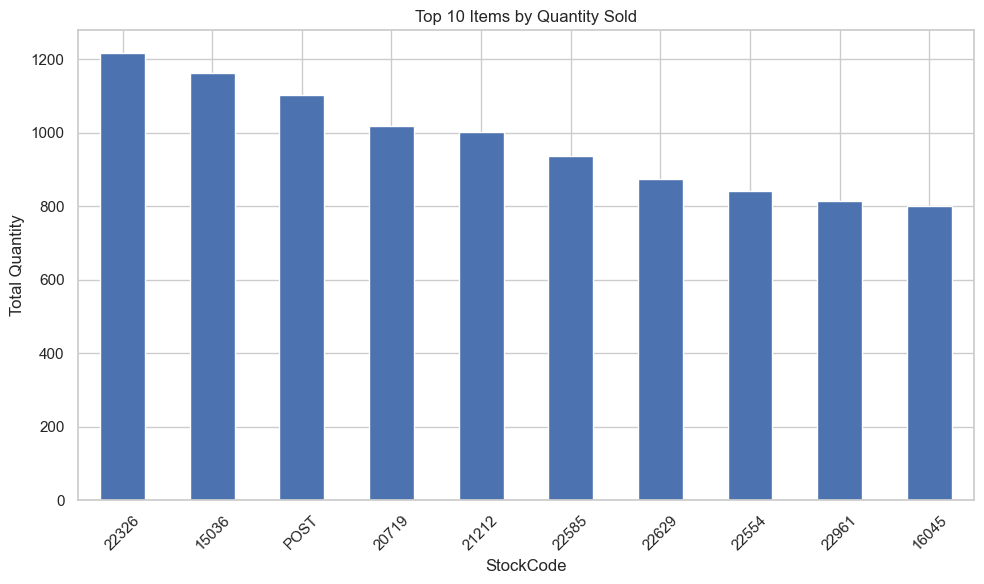

In [24]:
# #Section C: Visualization

# python
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

 #11. Top 10 items by quantity sold
top_10_items = sales_df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_10_items.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Items by Quantity Sold')
plt.xlabel('StockCode')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

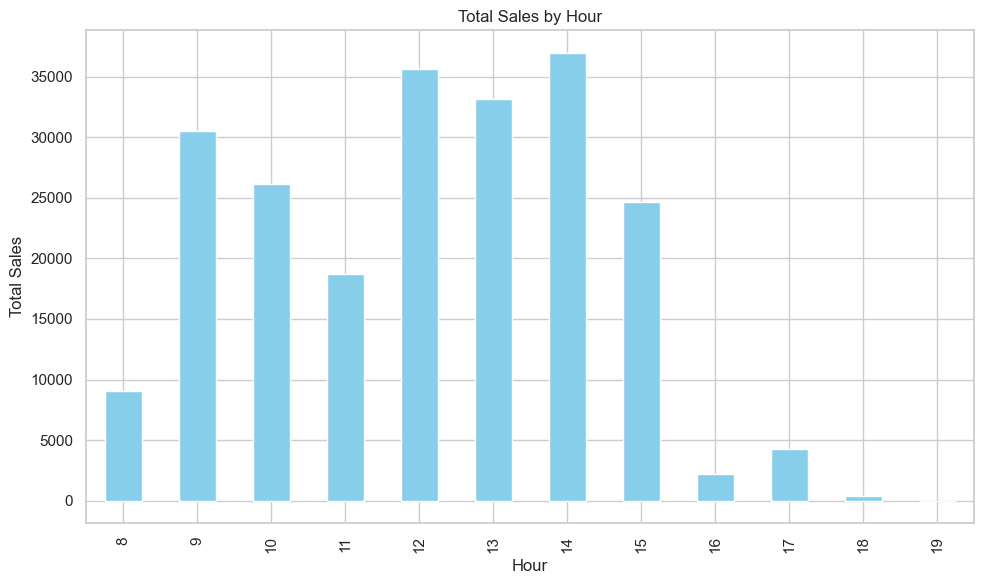

In [29]:

# 12. Sales per hour
sales_by_hour = sales_df.groupby('InvoiceHour')['TotalPrice'].sum()
sales_by_hour.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Sales by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()



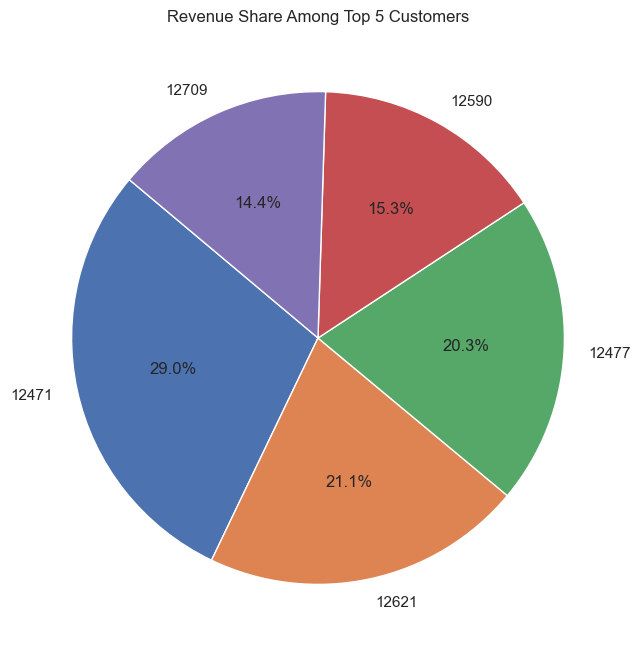

In [30]:
# 13. Pie chart of revenue by top 5 customers
top_5_customers = sales_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(5)
top_5_customers.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=140)
plt.title('Revenue Share Among Top 5 Customers')
plt.ylabel('')
plt.show()


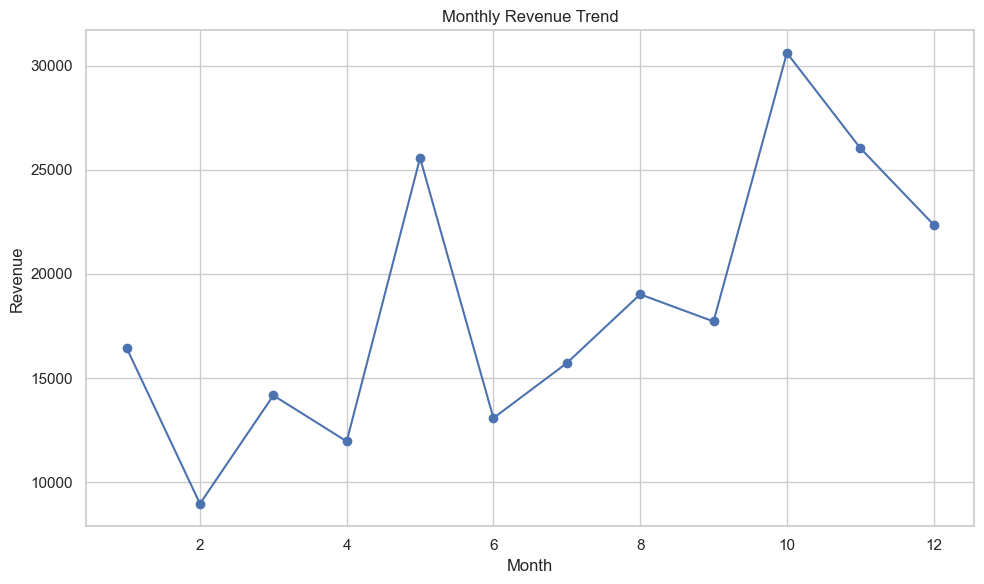

In [32]:
# 14. Monthly revenue trend
monthly_revenue = sales_df.groupby('InvoiceMonth')['TotalPrice'].sum()
monthly_revenue.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()



/var/folders/fr/5_6br7tn5_j9cl4dbzgztk0c0000gn/T/ipykernel_45070/437906640.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


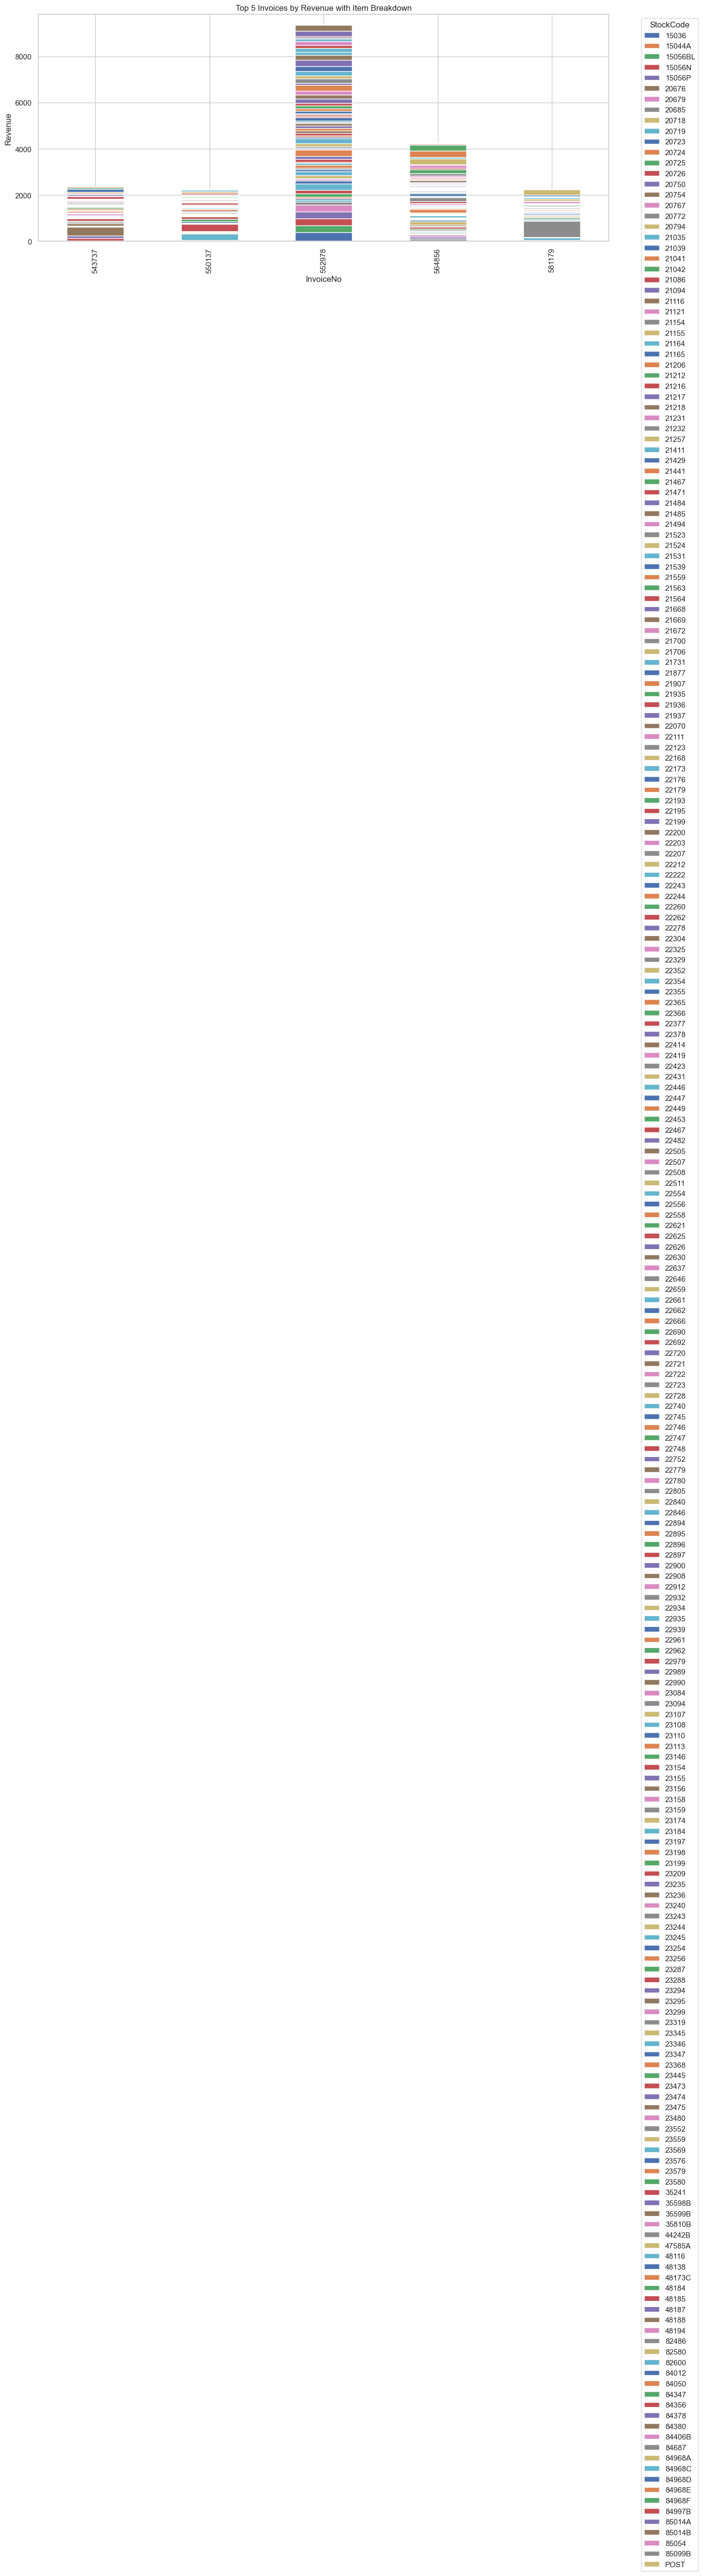

In [37]:
# 15. Stacked bar of top 5 invoices
top_5_invoices = sales_df.groupby('InvoiceNo')['TotalPrice'].sum().sort_values(ascending=False).head(5).index
invoice_items = sales_df[sales_df['InvoiceNo'].isin(top_5_invoices)]
invoice_pivot = invoice_items.pivot_table(index='InvoiceNo', columns='StockCode', values='TotalPrice', aggfunc='sum', fill_value=0)
invoice_pivot.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Top 5 Invoices by Revenue with Item Breakdown')
plt.xlabel('InvoiceNo')
plt.ylabel('Revenue')
plt.legend(title='StockCode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:

## Section D: Business Insights

# 16. Product with highest revenue
product_revenue = sales_df.groupby('StockCode')['TotalPrice'].sum().sort_values(ascending=False)
top_product_code = product_revenue.idxmax()
top_product_value = product_revenue.max()
product_name = stock_df.loc[stock_df['StockCode'] == top_product_code, 'Description'].values
product_name = product_name[0] if len(product_name) else 'N/A'
print(f"Top Product: {top_product_code} ({product_name})")
print(f"Total Revenue: {top_product_value:.2f}")




Top Product: POST (POSTAGE)
Total Revenue: 20821.00


In [39]:
# 17. Average order value
invoice_revenue = sales_df.groupby('InvoiceNo')['TotalPrice'].sum()
average_order_value = invoice_revenue.mean()
print(f"Average Order Value: {average_order_value:.2f}")



Average Order Value: 367.66


In [44]:
# 18. Customer with highest number of transactions
Customer_Total_transactions = sales_df.groupby('CustomerID')['InvoiceNo'].nunique()
Highest_Transactions_Customer = Customer_Total_transactions.idxmax()
Customer_Transactions_Count = Customer_Total_transactions.max()
print(f"Top Custome's ID: {Highest_Transactions_Customer}")
print(f"Total Number of Transactions: {Customer_Transactions_Count}")



Top Custome's ID: 12471
Total Number of Transactions: 49


In [47]:
sold_items = sales_df['StockCode'].nunique()
total_items = stock_df['StockCode'].nunique()
answers["Task 19"] = f"{(sold_items / total_items) * 100:.2f}%"

NameError: name 'answers' is not defined

In [45]:
# 19. % of stock items sold
sold_items = sales_df['StockCode'].nunique()
total_stock_items = stock_df['StockCode'].nunique()
sold_percentage = (sold_items / total_stock_items) * 100
print(f"Sold Stock Items: {sold_items}")
print(f"Total Stock Items in Inventory: {total_stock_items}")
print(f"Percentage of Stock Items Sold: {sold_percentage:.2f}%")



Sold Stock Items: 1671
Total Stock Items in Inventory: 1671
Percentage of Stock Items Sold: 100.00%


In [49]:
# 20. Sales items without match in StockDetails
unmatched_items = pd.merge(
    sales_df[['StockCode']].drop_duplicates(),
    stock_df[['StockCode']],
    on='StockCode',
    how='left',
    indicator=True
)
missing_in_stockdetails = unmatched_items[unmatched_items['_merge'] == 'left_only']
missing_count = missing_in_stockdetails.shape[0]
print(f"Number of products in sales data with no match in StockDetails: {missing_count}")
# Close the database connection
conn.close()

Number of products in sales data with no match in StockDetails: 0
